## Problem statement

#### Extract reviews of any product from ecommerce website like amazon and perform emotion mining.
#### We will use the reviews data extracted from the https://jmcauley.ucsd.edu/data/amazon/ link. We will use Musical Instruments reviews as other files are very big in size.

In [1]:
## Importing Libraries

import pandas as pd
import numpy as np
import string
import re
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import spacy # language models
from wordcloud import WordCloud
import seaborn as sns

In [2]:
## Loading the dataset

reviews=pd.read_json('Musical_Instruments_5.json', lines=True)

In [3]:
reviews.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [4]:
reviews.tail()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]","Great, just as expected. Thank to all.",5,Five Stars,1405814400,"07 20, 2014"
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",I've been thinking about trying the Nanoweb st...,5,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014"
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",I have tried coated strings in the past ( incl...,4,Good for coated.,1405987200,"07 22, 2014"
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4,Taylor Made,1404172800,"07 1, 2014"
10260,A2WA8TDCTGUADI,B00JBIVXGC,TheTerrorBeyond,"[0, 0]","These strings are really quite good, but I wou...",4,"These strings are really quite good, but I wou...",1405468800,"07 16, 2014"


In [5]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviewerID      10261 non-null  object
 1   asin            10261 non-null  object
 2   reviewerName    10234 non-null  object
 3   helpful         10261 non-null  object
 4   reviewText      10261 non-null  object
 5   overall         10261 non-null  int64 
 6   summary         10261 non-null  object
 7   unixReviewTime  10261 non-null  int64 
 8   reviewTime      10261 non-null  object
dtypes: int64(2), object(7)
memory usage: 721.6+ KB


In [6]:
## Checking for null and duplicate values

reviews.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         0
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

<AxesSubplot:>

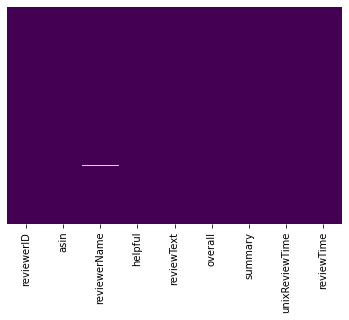

In [7]:
sns.heatmap(reviews.isna(),cmap='viridis',cbar=False,yticklabels=False)

In [8]:
## Lets drop Null Values 

In [9]:
reviews.dropna(axis=0,inplace=True)

In [10]:
reviews.shape

(10234, 9)

In [11]:
reviews

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014"
...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]","Great, just as expected. Thank to all.",5,Five Stars,1405814400,"07 20, 2014"
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",I've been thinking about trying the Nanoweb st...,5,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014"
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",I have tried coated strings in the past ( incl...,4,Good for coated.,1405987200,"07 22, 2014"
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4,Taylor Made,1404172800,"07 1, 2014"


In [12]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10234 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviewerID      10234 non-null  object
 1   asin            10234 non-null  object
 2   reviewerName    10234 non-null  object
 3   helpful         10234 non-null  object
 4   reviewText      10234 non-null  object
 5   overall         10234 non-null  int64 
 6   summary         10234 non-null  object
 7   unixReviewTime  10234 non-null  int64 
 8   reviewTime      10234 non-null  object
dtypes: int64(2), object(7)
memory usage: 799.5+ KB


In [13]:
reviews['overall'].value_counts()

5    6918
4    2080
3     771
2     249
1     216
Name: overall, dtype: int64

C:\Users\samee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='overall', ylabel='count'>

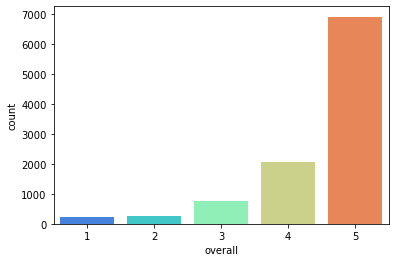

In [14]:
sns.countplot(reviews['overall'],palette='rainbow')

In [15]:
reviews['reviewerName'].value_counts()

Amazon Customer                 66
StormJH1                        42
David W "Dave"                  38
David G                         38
John                            37
                                ..
Rad5030                          2
caffeinebrain                    2
TheSunrisePost                   2
Amazon Customer "kateTaylor"     1
ManUPT                           1
Name: reviewerName, Length: 1397, dtype: int64

In [16]:
reviews.groupby('reviewerName')['overall'].value_counts().unstack().fillna(0)

overall,1,2,3,4,5
reviewerName,,,,,
"   ""  """,0.0,0.0,1.0,1.0,6.0
'brother' Bill,1.0,0.0,2.0,1.0,2.0
3rdtimer,0.0,0.0,1.0,3.0,1.0
@ciscoza,0.0,1.0,0.0,1.0,3.0
A Carter,0.0,0.0,1.0,3.0,1.0
...,...,...,...,...,...
zak,0.0,0.0,2.0,1.0,2.0
zdeptawa,0.0,0.0,0.0,0.0,5.0
zj,0.0,0.0,0.0,1.0,5.0


In [17]:
reviews['overall'].describe()

count    10234.000000
mean         4.488665
std          0.894361
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: overall, dtype: float64

C:\Users\samee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='overall', ylabel='Density'>

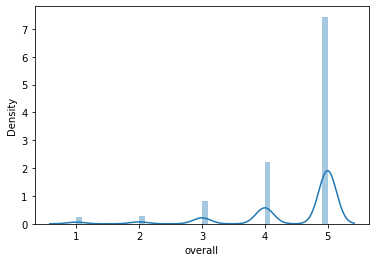

In [18]:
sns.distplot(reviews['overall'])

In [19]:
reviews['reviewText'].head()

0    Not much to write about here, but it does exac...
1    The product does exactly as it should and is q...
2    The primary job of this device is to block the...
3    Nice windscreen protects my MXL mic and preven...
4    This pop filter is great. It looks and perform...
Name: reviewText, dtype: object

In [20]:
## Applying Regular Expressions to clean the data

def clean_text(text):
    text=re.sub(r"[^a-zA-Z]", " ",text)
    return text

reviews['ReviewText']=reviews['reviewText'].apply(clean_text)
reviews['summary']=reviews['summary'].apply(clean_text)
reviews.drop(columns='reviewText',inplace=True)

In [21]:
reviews.head()

,reviewerID,asin,reviewerName,helpful,overall,summary,unixReviewTime,reviewTime,ReviewText
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5,good,1393545600,"02 28, 2014",Not much to write about here but it does exac...
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5,Jake,1363392000,"03 16, 2013",The product does exactly as it should and is q...
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5,It Does The Job Well,1377648000,"08 28, 2013",The primary job of this device is to block the...
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5,No more pops when I record my vocals,1392940800,"02 21, 2014",This pop filter is great It looks and perform...


## Using TextBlob to genereate subjectivity and polarity on review text


In [22]:
from textblob import TextBlob

In [23]:
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["ReviewText"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])
# Adding Subjectivity & Polarity
reviews[["subjectivity", "polarity"]] = reviews.apply(sentiment_analysis, axis=1)
reviews

,reviewerID,asin,reviewerName,helpful,overall,summary,unixReviewTime,reviewTime,ReviewText,subjectivity,polarity
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5,good,1393545600,"02 28, 2014",Not much to write about here but it does exac...,0.398611,0.250000
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5,Jake,1363392000,"03 16, 2013",The product does exactly as it should and is q...,0.327778,0.000000
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5,It Does The Job Well,1377648000,"08 28, 2013",The primary job of this device is to block the...,0.434286,0.167500
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...,0.925000,0.200000
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5,No more pops when I record my vocals,1392940800,"02 21, 2014",This pop filter is great It looks and perform...,0.750000,0.800000
...,...,...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]",5,Five Stars,1405814400,"07 20, 2014",Great just as expected Thank to all,0.575000,0.350000
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",5,Long life and for some players a good econom...,1404259200,"07 2, 2014",I ve been thinking about trying the Nanoweb st...,0.463792,0.195483
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",4,Good for coated,1405987200,"07 22, 2014",I have tried coated strings in the past incl...,0.401459,0.197768
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]",4,Taylor Made,1404172800,"07 1, 2014",Well MADE by Elixir and DEVELOPED with Taylor...,0.532099,0.148479


## Using TextBlob to genereate subjectivity and polarity on review summary


In [24]:
def clean_text_s(ds):
    sentiments=TextBlob(ds["summary"]).sentiment
    return pd.Series([sentiments.subjectivity,sentiments.polarity])

reviews[['Subjectivity_summary','Polarity_summary']]=reviews.apply(clean_text_s,axis=1)

In [25]:
reviews

,reviewerID,asin,reviewerName,helpful,overall,summary,unixReviewTime,reviewTime,ReviewText,subjectivity,polarity,Subjectivity_summary,Polarity_summary
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5,good,1393545600,"02 28, 2014",Not much to write about here but it does exac...,0.398611,0.250000,0.6,0.700000
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5,Jake,1363392000,"03 16, 2013",The product does exactly as it should and is q...,0.327778,0.000000,0.0,0.000000
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5,It Does The Job Well,1377648000,"08 28, 2013",The primary job of this device is to block the...,0.434286,0.167500,0.0,0.000000
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...,0.925000,0.200000,0.6,0.700000
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5,No more pops when I record my vocals,1392940800,"02 21, 2014",This pop filter is great It looks and perform...,0.750000,0.800000,0.5,-0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]",5,Five Stars,1405814400,"07 20, 2014",Great just as expected Thank to all,0.575000,0.350000,0.0,0.000000
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",5,Long life and for some players a good econom...,1404259200,"07 2, 2014",I ve been thinking about trying the Nanoweb st...,0.463792,0.195483,0.4,0.283333
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",4,Good for coated,1405987200,"07 22, 2014",I have tried coated strings in the past incl...,0.401459,0.197768,0.6,0.700000
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]",4,Taylor Made,1404172800,"07 1, 2014",Well MADE by Elixir and DEVELOPED with Taylor...,0.532099,0.148479,0.0,0.000000


In [26]:
## Plotting Wordcloud on Reviews

from wordcloud import WordCloud

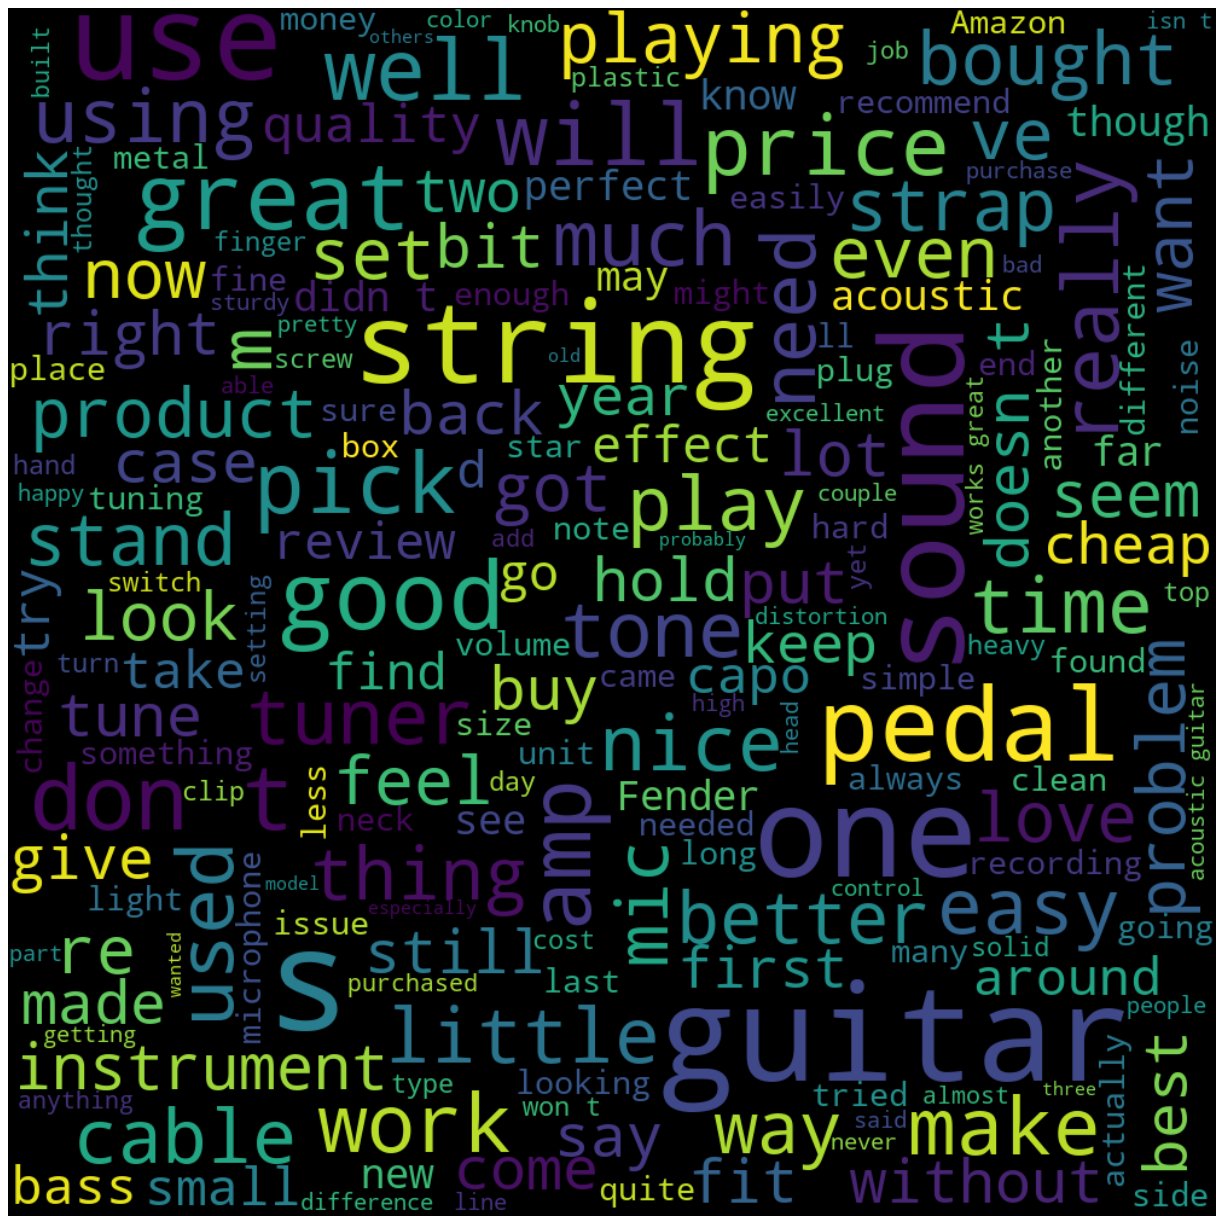

In [27]:
allwords=" ".join([rev for rev in reviews['ReviewText']])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

#### As the reviews are for Musical instruments, in the above word cloud we can words related to music. The most repetitive words are guitar, string, sound, tone, tuner, instrument, etc


## Plotting wordcloud on reviews summary

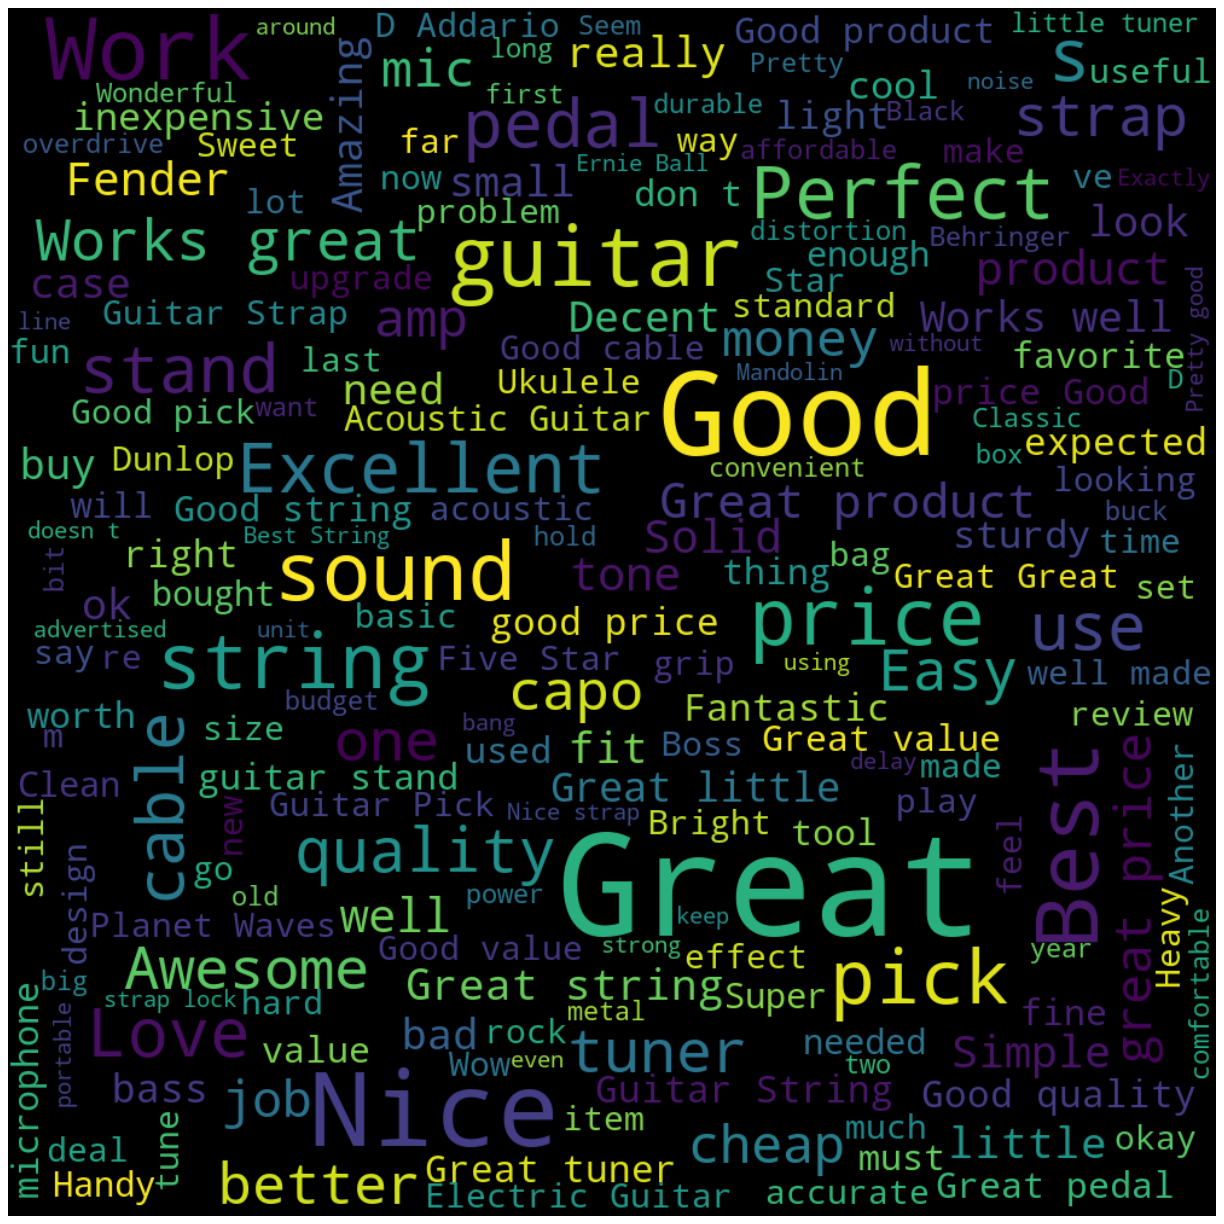

In [28]:
allwords=' '.join([rev for rev in reviews['summary']])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

#### In the review summary we see that the most repetitive words are Good, Great, Great product, Excellent, Nice, Perfect,sound, Price, etc. So we can see that the most of the review summary are showing very positive words which means the buyers are happy with the product


## Emotion Mining Based on Review Text

In [29]:
def analysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
    
reviews['Analysis_Rev']=reviews['polarity'].apply(analysis)
reviews

,reviewerID,asin,reviewerName,helpful,overall,summary,unixReviewTime,reviewTime,ReviewText,subjectivity,polarity,Subjectivity_summary,Polarity_summary,Analysis_Rev
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5,good,1393545600,"02 28, 2014",Not much to write about here but it does exac...,0.398611,0.250000,0.6,0.700000,Positive
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5,Jake,1363392000,"03 16, 2013",The product does exactly as it should and is q...,0.327778,0.000000,0.0,0.000000,Neutral
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5,It Does The Job Well,1377648000,"08 28, 2013",The primary job of this device is to block the...,0.434286,0.167500,0.0,0.000000,Positive
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...,0.925000,0.200000,0.6,0.700000,Positive
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5,No more pops when I record my vocals,1392940800,"02 21, 2014",This pop filter is great It looks and perform...,0.750000,0.800000,0.5,-0.250000,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]",5,Five Stars,1405814400,"07 20, 2014",Great just as expected Thank to all,0.575000,0.350000,0.0,0.000000,Positive
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",5,Long life and for some players a good econom...,1404259200,"07 2, 2014",I ve been thinking about trying the Nanoweb st...,0.463792,0.195483,0.4,0.283333,Positive
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",4,Good for coated,1405987200,"07 22, 2014",I have tried coated strings in the past incl...,0.401459,0.197768,0.6,0.700000,Positive
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]",4,Taylor Made,1404172800,"07 1, 2014",Well MADE by Elixir and DEVELOPED with Taylor...,0.532099,0.148479,0.0,0.000000,Positive


## Emotion Mining on SUmmary 

In [30]:
def Analysis_sum(score):
    if score<0:
        return "negative"
    elif score==0:
        return "neutral"
    else:
        return "positive"
    
reviews['Summary_Analysis'] =reviews['Polarity_summary'].apply(Analysis_sum) 
reviews

,reviewerID,asin,reviewerName,helpful,overall,summary,unixReviewTime,reviewTime,ReviewText,subjectivity,polarity,Subjectivity_summary,Polarity_summary,Analysis_Rev,Summary_Analysis
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5,good,1393545600,"02 28, 2014",Not much to write about here but it does exac...,0.398611,0.250000,0.6,0.700000,Positive,positive
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5,Jake,1363392000,"03 16, 2013",The product does exactly as it should and is q...,0.327778,0.000000,0.0,0.000000,Neutral,neutral
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5,It Does The Job Well,1377648000,"08 28, 2013",The primary job of this device is to block the...,0.434286,0.167500,0.0,0.000000,Positive,neutral
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...,0.925000,0.200000,0.6,0.700000,Positive,positive
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5,No more pops when I record my vocals,1392940800,"02 21, 2014",This pop filter is great It looks and perform...,0.750000,0.800000,0.5,-0.250000,Positive,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]",5,Five Stars,1405814400,"07 20, 2014",Great just as expected Thank to all,0.575000,0.350000,0.0,0.000000,Positive,neutral
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",5,Long life and for some players a good econom...,1404259200,"07 2, 2014",I ve been thinking about trying the Nanoweb st...,0.463792,0.195483,0.4,0.283333,Positive,positive
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",4,Good for coated,1405987200,"07 22, 2014",I have tried coated strings in the past incl...,0.401459,0.197768,0.6,0.700000,Positive,positive
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]",4,Taylor Made,1404172800,"07 1, 2014",Well MADE by Elixir and DEVELOPED with Taylor...,0.532099,0.148479,0.0,0.000000,Positive,neutral


## TF-IDF Vectorizer

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_n_gram_max_features=TfidfVectorizer(norm='l2',analyzer='word',
                                              ngram_range=(1,3),max_features=500)
tf_idf_matrix_n_gram_max_features=vectorizer_n_gram_max_features.fit_transform(reviews)

In [32]:
print(vectorizer_n_gram_max_features.get_feature_names())

['analysis_rev', 'asin', 'helpful', 'overall', 'polarity', 'polarity_summary', 'reviewerid', 'reviewername', 'reviewtext', 'reviewtime', 'subjectivity', 'subjectivity_summary', 'summary', 'summary_analysis', 'unixreviewtime']


In [33]:
print(tf_idf_matrix_n_gram_max_features.toarray())

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [34]:
reviews['Analysis_Rev'].value_counts()

Positive    9419
Negative     648
Neutral      167
Name: Analysis_Rev, dtype: int64

In [35]:
reviews['Summary_Analysis'].value_counts()

positive    6736
neutral     2934
negative     564
Name: Summary_Analysis, dtype: int64

#### We could see that more than 50% of the reviews and review summary are positive which means customers are happy with the products brought from Amazon
